In [1]:
import pandas as pd
import numpy as np

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Wed Jun 30 20:15:38 2021
@author: Don Pedrito Diaz
"""

def find_header(df):
    #Get row and column of #Fecha on the data frame
    result=df.isin(["Fecha"])   
    column_date=result.any()
    column_date=column_date[column_date==True].index[0]
    row_date=result[column_date][result[column_date]==True].index[0]
    
    #On row date get the columns where are the hours [0:23]
    hours=[i for i in range(0,24)]
    #Convert hours from integers to string, in case text above header
    hours_str = list(map(str, hours))
    #List of Combined hours in format integers and string
    hours_comb=hours+hours_str
    #Find by combined hours format
    result=df.iloc[row_date,:].isin(hours_comb) 
    #Get column names for the searched hours 
    columns_hours=list(result[result==True].index)
    
    
    #List of columns wich contains the interested header of the dataframe
    columns=list([column_date])+columns_hours
    #From dataframe only take such columns
    df=df[columns]
    #Set new columns header
    new_columns=["Fecha"]+hours_str
    df.columns=new_columns

    #Get label of parameter downloaded and assing to a entire new column
    #df['file'] = df.iloc[0][0]
    
    #Drop row where the header was found and rows before it
    drop_rows=[i for i in range(0,row_date+1)]
    df = df.drop(drop_rows).reset_index(drop=True)
    
    #Change format of elements in df that could be in string to numeric in hours column
    df[hours_str] = df[hours_str].apply(pd.to_numeric)
    
    
    #Delate nan values on Fecha column
    df.dropna(subset = ["Fecha"], inplace=True)    
    
    #Change format of Fecha column to datetime format
    df["Fecha"] = pd.to_datetime(df["Fecha"])
    
    return df


def read_dataFile(path):
    df = pd.read_excel(path)

    df=find_header(df)

    return df

#http://portalbissrs.xm.com.co/trpr/Histricos/Precios/Precio_Bolsa_Nacional_(%24kwh)_1995.xlsx?

temp = pd.DataFrame({'Fecha' : []})

for year in range(1995, 2020):
    filePath = f'http://portalbissrs.xm.com.co/trpr/Histricos/Precios/Precio_Bolsa_Nacional_(%24kwh)_{year}.xlsx?'
    new_data = read_dataFile(filePath)
    temp = pd.concat([temp, new_data])
    

def melt_df(df):
    #Hours
    hours=[i for i in range(0,24)]
    #Convert hours from integers to string, column names
    hours_str = list(map(str, hours))
    #Melt original dataframe
    df_melt=pd.melt(df,id_vars=["Fecha"],value_vars=hours_str,var_name='Hour', value_name='Precio_Bolsa')
    #Convert string to float
    df_melt["Hour"]=pd.to_numeric(df_melt["Hour"])
    
    #Add hours to the date which only had considered the day
    df_melt["Fecha"]=df_melt["Fecha"]+pd.to_timedelta(df_melt["Hour"],unit='H')
    #Order de data
    df_melt.sort_values(by=['Fecha'], inplace=True, ascending=False) #Most recent first
    #Reset index
    df_melt=df_melt.reset_index(drop=True)
    
    return df_melt

temp_melt=melt_df(temp)

In [3]:
temp = pd.DataFrame({'Fecha' : []})

for year in range(1995, 2020):
    filePath = f'http://portalbissrs.xm.com.co/trpr/Histricos/Precios/Precio_Bolsa_Nacional_(%24kwh)_{year}.xlsx?'
    new_data = read_dataFile(filePath)
    temp = pd.concat([temp, new_data])

In [4]:
temp2 = pd.DataFrame({'Fecha' : []})
for year in range(2020, 2022):
    filePath = f'http://portalbissrs.xm.com.co/trpr/Histricos/Precio_Bolsa_Nacional_(%24kwh)_{year}.xlsx?'
    new_data = read_dataFile(filePath)
    temp2 = pd.concat([temp2, new_data])

In [5]:
melt_df(temp).sort_values(by='Fecha')

,Fecha,Hour,Precio_Bolsa
214343,1995-07-20 00:00:00,0,NaN
214342,1995-07-20 01:00:00,1,1.073000
214341,1995-07-20 02:00:00,2,1.073000
214340,1995-07-20 03:00:00,3,1.073000
214339,1995-07-20 04:00:00,4,1.073000
...,...,...,...
4,2019-12-31 19:00:00,19,349.163476
3,2019-12-31 20:00:00,20,269.163476
2,2019-12-31 21:00:00,21,269.163476
1,2019-12-31 22:00:00,22,269.163476


In [6]:
melt_df(temp2).sort_values(by='Fecha')

,Fecha,Hour,Precio_Bolsa
13463,2020-01-01 00:00:00,0,72.02
13462,2020-01-01 01:00:00,1,136.71
13461,2020-01-01 02:00:00,2,127.71
13460,2020-01-01 03:00:00,3,127.71
13459,2020-01-01 04:00:00,4,127.71
...,...,...,...
4,2021-07-14 19:00:00,19,83.53
3,2021-07-14 20:00:00,20,83.31
2,2021-07-14 21:00:00,21,83.31
1,2021-07-14 22:00:00,22,83.31


In [7]:
Market_Price = melt_df(temp).sort_values(by='Fecha').append(melt_df(temp2).sort_values(by='Fecha')).drop('Hour', axis = 1).set_index('Fecha')
Market_Price

,Precio_Bolsa
Fecha,
1995-07-20 00:00:00,NaN
1995-07-20 01:00:00,1.073
1995-07-20 02:00:00,1.073
1995-07-20 03:00:00,1.073
1995-07-20 04:00:00,1.073
...,...
2021-07-14 19:00:00,83.530
2021-07-14 20:00:00,83.310
2021-07-14 21:00:00,83.310


In [8]:
Market_Price['Year'] = Market_Price.index.year
Market_Price['Month'] = Market_Price.index.month
Market_Price['Weekday Name'] = Market_Price.index.day_name()
Market_Price['Hour'] = Market_Price.index.hour
Market_Price['Date'] = Market_Price.index.date
Market_Price

,Precio_Bolsa,Year,Month,Weekday Name,Hour,Date
Fecha,,,,,,
1995-07-20 00:00:00,NaN,1995,7,Thursday,0,1995-07-20
1995-07-20 01:00:00,1.073,1995,7,Thursday,1,1995-07-20
1995-07-20 02:00:00,1.073,1995,7,Thursday,2,1995-07-20
1995-07-20 03:00:00,1.073,1995,7,Thursday,3,1995-07-20
1995-07-20 04:00:00,1.073,1995,7,Thursday,4,1995-07-20
...,...,...,...,...,...,...
2021-07-14 19:00:00,83.530,2021,7,Wednesday,19,2021-07-14
2021-07-14 20:00:00,83.310,2021,7,Wednesday,20,2021-07-14
2021-07-14 21:00:00,83.310,2021,7,Wednesday,21,2021-07-14


In [9]:
Daily_Market_Price = Market_Price.Precio_Bolsa.groupby(Market_Price.Date).agg(['min','max', np.mean, np.median, np.std])
Daily_Market_Price['fluctuation'] = Daily_Market_Price['max'] - Daily_Market_Price['min']
Daily_Market_Price

,min,max,mean,median,std,fluctuation
Date,,,,,,
1995-07-20,1.073,2.827,1.409435,1.073,0.627518,1.754
1995-07-21,1.000,16.670,4.924333,5.000,4.337455,15.670
1995-07-22,1.000,2.500,1.269500,1.188,0.401461,1.500
1995-07-23,0.100,1.238,0.953083,1.000,0.344377,1.138
1995-07-24,0.990,22.500,4.305917,2.500,5.671871,21.510
...,...,...,...,...,...,...
2021-07-10,83.150,97.760,85.156250,84.000,3.785181,14.610
2021-07-11,83.100,83.920,83.352917,83.100,0.373462,0.820
2021-07-12,84.430,85.340,84.980000,85.290,0.418642,0.910


In [10]:
from matplotlib import pyplot

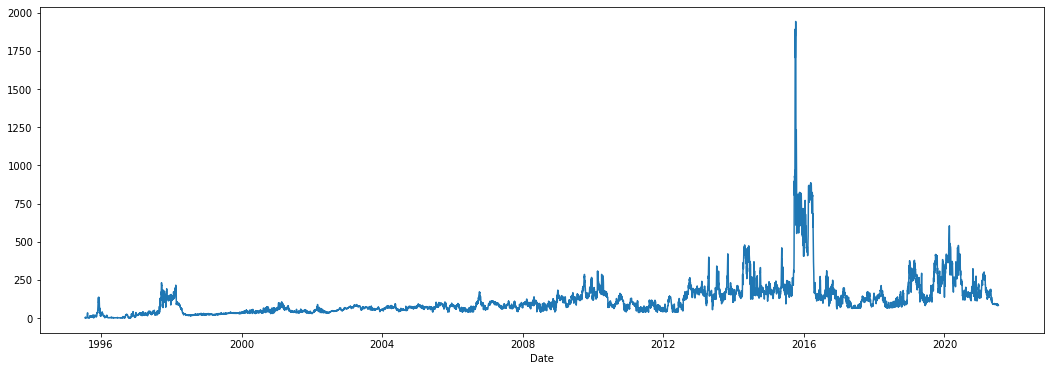

In [11]:
Daily_Market_Price['mean'].plot(figsize=(18, 6))

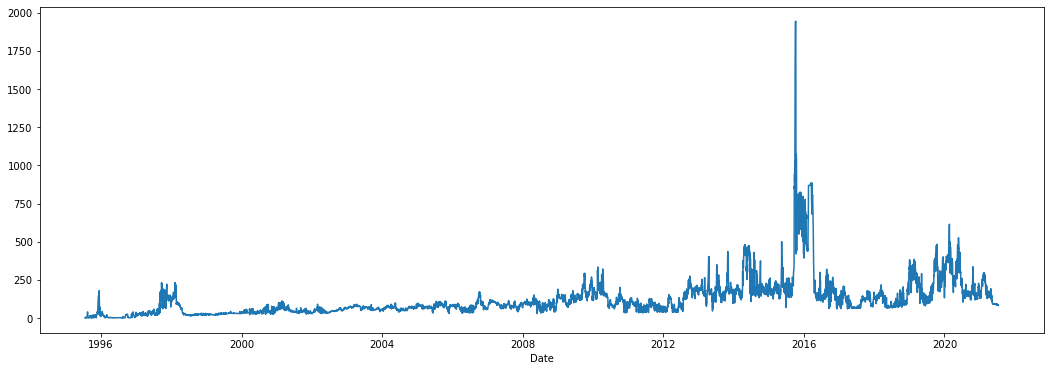

In [12]:
Daily_Market_Price['median'].plot(figsize=(18, 6))

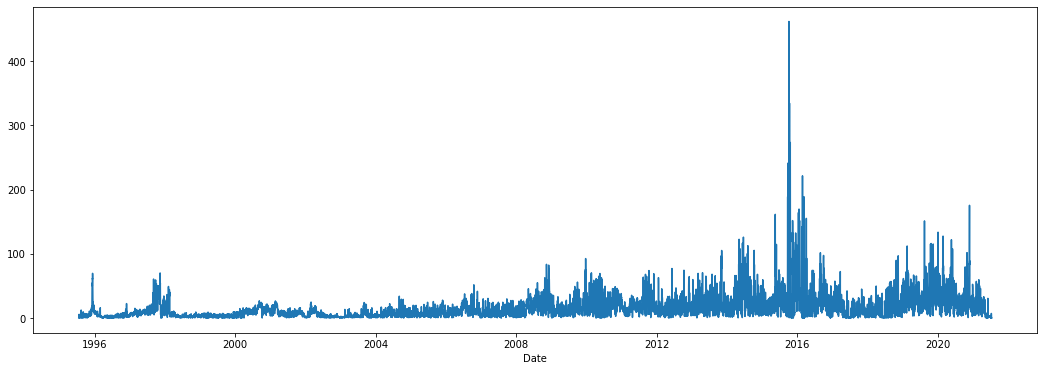

In [13]:
Daily_Market_Price['std'].plot(figsize=(18, 6))

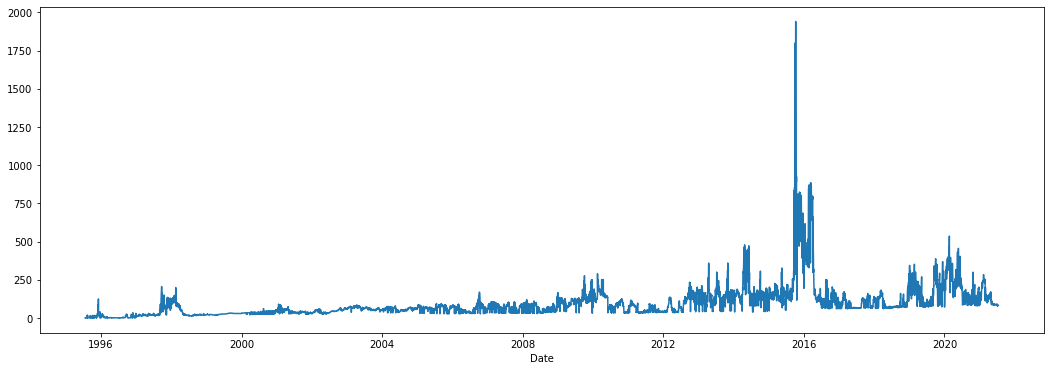

In [14]:
Daily_Market_Price['min'].plot(figsize=(18, 6))

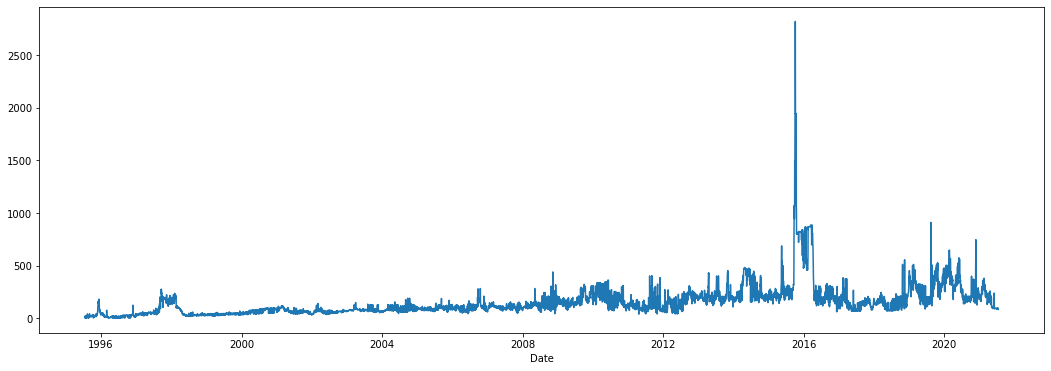

In [15]:
Daily_Market_Price['max'].plot(figsize=(18, 6))

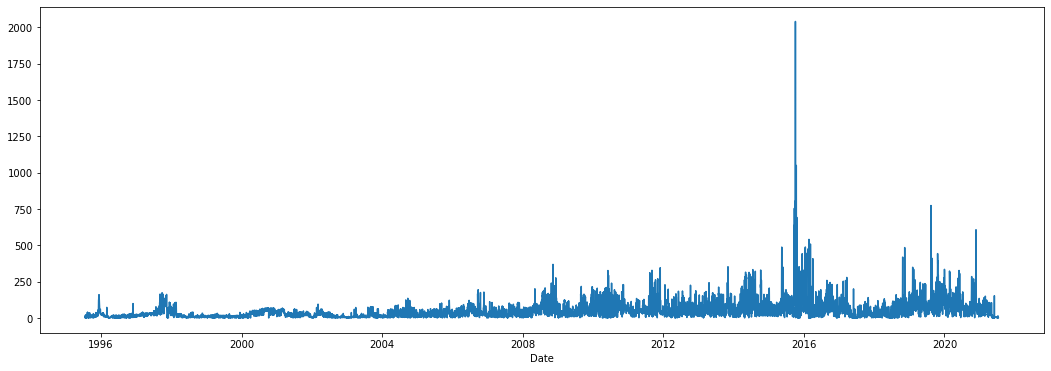

In [16]:
Daily_Market_Price['fluctuation'].plot(figsize=(18, 6))

In [18]:
Daily_Market_Price.to_csv('ts_Market_Price.csv')